In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
import missingno as msno
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

In [4]:
df = pd.read_csv('fetal_health.csv')

## Limpeza dos dados

In [5]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

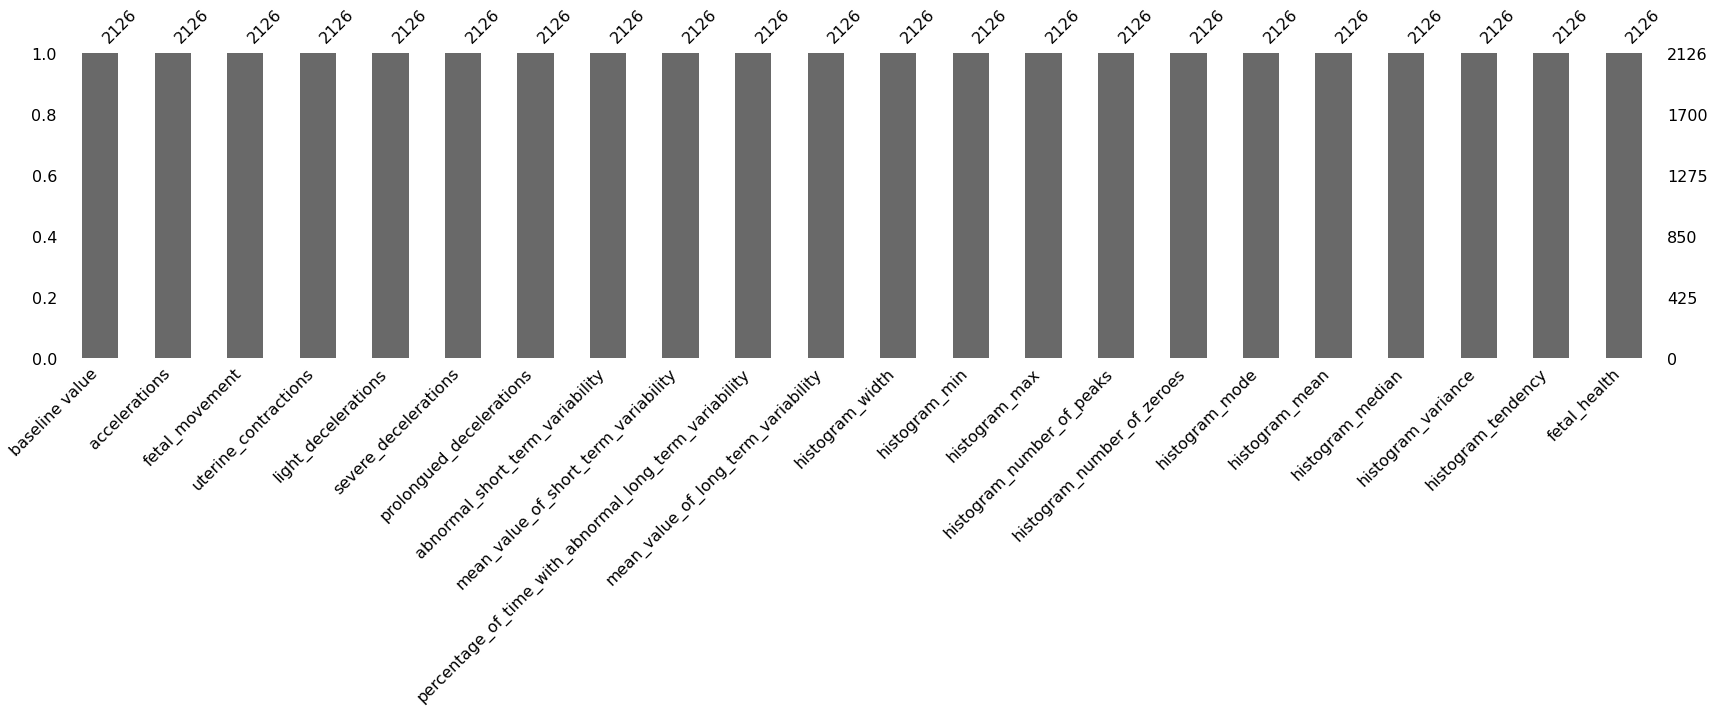

In [6]:
msno.bar(df)
plt.tight_layout()
#plt.savefig('missingvalues.pdf', width=1)

In [7]:
df[df.duplicated(keep=False)]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
67,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
229,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
233,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
304,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
323,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
326,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0


In [8]:
df.drop_duplicates(inplace=True)

## Padronização dos dados

In [9]:
X = df.drop(["fetal_health"],axis=1)
Y = df["fetal_health"]

cols = X.columns.tolist()

scaler_features = StandardScaler()

X_scaled= scaler_features.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols)   

# Salvando o dataset padronizado

In [10]:
X_scaled.reset_index(drop=True,inplace=True)

Y.reset_index(drop=True,inplace=True)

X_scaled["fetal_health"] = Y.copy()

In [11]:
#X_scaled.to_csv('xscaled.csv', index=False)

## Verificando as boas features

/home/ana/Videos/data_mining/venv/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/ana/Videos/data_mining/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


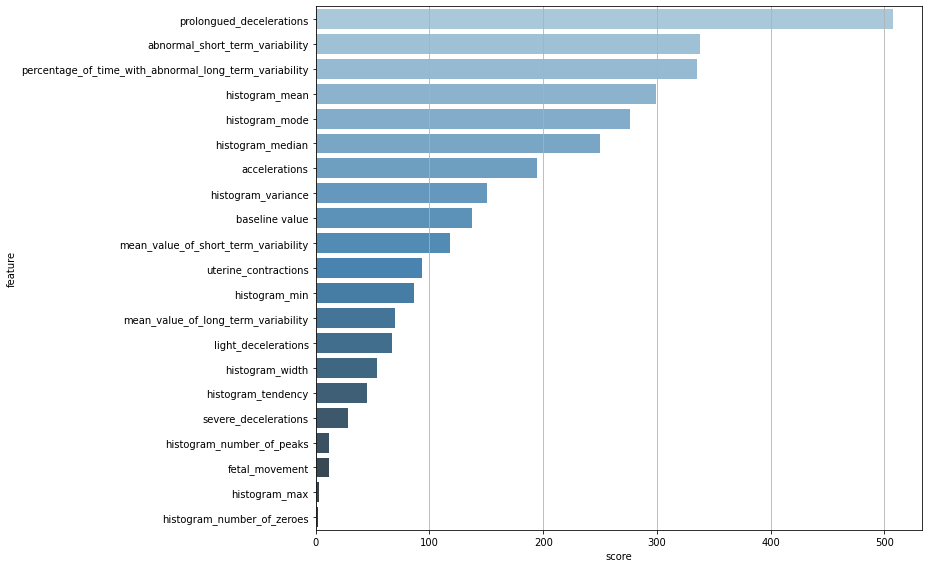

In [12]:
features_to_use = SelectKBest(k='all')

features_fit = features_to_use.fit(X_scaled,Y)

df_scores = pd.DataFrame({'feature': X.columns.tolist(), 'score': list(features_fit.scores_)[:-1]})
df_scores.sort_values(by='score', axis=0, ascending=False, inplace=True)

plt.figure(figsize=(13,8))
plt.grid(True)
sns.barplot(df_scores.score, df_scores.feature, palette='Blues_d')
plt.tight_layout()

#plt.savefig('featuresimportance.eps', dpi=1200)

In [13]:
df_scores.style.background_gradient()

,feature,score
6,prolongued_decelerations,507.304309
7,abnormal_short_term_variability,337.703020
9,percentage_of_time_with_abnormal_long_term_variability,335.386156
17,histogram_mean,298.759569
16,histogram_mode,276.382795
18,histogram_median,249.699523
1,accelerations,194.618345
19,histogram_variance,150.955827
0,baseline value,137.833999
8,mean_value_of_short_term_variability,118.050463


In [14]:
#pd.DataFrame({'feature': X.columns.tolist(), 'score': list(features_fit.scores_), 'pvalue': list(features_fit.pvalues_)})

In [15]:
X_scaled = X_scaled[df_scores[df_scores['score']>100]['feature']]
X_scaled

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_mode,histogram_median,accelerations,histogram_variance,baseline value,mean_value_of_short_term_variability
0,-0.26964,1.514300,1.811237,0.153804,-1.064409,-1.180575,-0.823776,1.863218,-1.352782,-0.944425
1,-0.26964,-1.746497,-0.534294,0.089729,0.216224,0.131985,0.726444,-0.237919,-0.132665,0.865205
2,-0.26964,-1.804726,-0.534294,0.025654,0.216224,-0.006179,-0.048666,-0.203474,-0.030989,0.865205
3,-0.26964,-1.804726,-0.534294,-0.038421,-0.027706,-0.075261,-0.048666,-0.203474,0.070687,1.204511
4,-0.26964,-1.804726,-0.534294,0.089729,-0.027706,-0.006179,0.984814,-0.272364,-0.132665,1.204511
...,...,...,...,...,...,...,...,...,...,...
2108,-0.26964,1.863671,0.829387,0.986778,0.948014,0.960970,-0.823776,-0.582368,0.680746,-1.283731
2109,-0.26964,1.805442,0.665745,0.858628,0.887031,0.891888,-0.565406,-0.547923,0.680746,-1.057527
2110,-0.26964,1.863671,0.556650,0.858628,0.948014,0.960970,-0.565406,-0.513478,0.680746,-1.057527
2111,-0.26964,1.805442,0.938481,0.794553,0.887031,0.891888,-0.565406,-0.513478,0.680746,-1.057527
